In [1]:
# General-purpose libraries for data manipulation, numerical operations, and visualization
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Transformers library: Pretrained models and tools for natural language processing 
from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline, AdamW

In [4]:
# defining the tokenizer, model and the classifier
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [5]:
# Open and read the JSON file
with open('/Users/mayankgrover/Documents/AIT726/Project/btc_train.json', 'r') as file:
  dataBTC = json.load(file)

with open('/Users/mayankgrover/Documents/AIT726/Project/eth_train.json', 'r') as file:
  dataETH = json.load(file)


In [6]:
dataBTC['2023-02-11']

{'prices': 21870.8740640545,
 'news': ["dubai's university cud to embrace crypto paymentsthe canadian university of dubai joined forces with binance to allow payments in btc, eth, and other crypto assets. (sentiment:positive)",
  'two thirds of millennials view bitcoin as safe haven (survey)67% of the surveyed millennials consider btc a safe haven due to its decentralized nature and fixed supply cap. (sentiment:positive)',
  'bitcoin miners as energy buyers, explainedbitcoin miners as energy buyers utilize renewable energy sources and excess electricity offered by utility companies to fuel their mining operations. (sentiment:positive)',
  "paypal owned $604 million in crypto last yearpaypal's wallet service held over half a billion dollars in bitcoin and ethereum on its customers' behalf in 2022. (sentiment:positive)",
  "bitcoin is already in its 'next bull market cycle' -- pantera capitalthis cycle's bitcoin and altcoin lows are behind us, pantera ceo dan morehead says as he looks to

In [7]:
def createDF(dataBTC):
    """
    Converts nested data containing dates, prices, and news with optional sentiment 
    into a flattened DataFrame for analysis.

    Args:
        dataBTC (dict): Dictionary with keys as dates, and values as dictionaries containing
                        'prices' and a list of 'news'.

    Returns:
        pd.DataFrame: Flattened DataFrame with columns ['date', 'price', 'news', 'sentiment'].
    """
    rows = []

    # Iterate through each date and its corresponding details
    for date, details in dataBTC.items():
        price = details['prices']  # Get the price for the date
        news_list = details['news']  # Get the list of news articles

        # Iterate through each news item for the given date
        for news in news_list:
            if "(sentiment:" in news:
                # Extract the news text and sentiment if sentiment is present
                news_text, sentiment = news.rsplit(" (sentiment:", 1)
                sentiment = sentiment.rstrip(')')  # Remove trailing parenthesis from sentiment
            else:
                # If no sentiment is present, default to None
                news_text = news
                sentiment = None

            # Append the flattened data to the rows list
            rows.append({
                'date': date,
                'price': price,
                'news': news_text.strip(),  # Strip leading/trailing whitespace
                'sentiment': sentiment.strip() if sentiment else None  # Handle None sentiment
            })

    # Create a DataFrame from the rows list
    df = pd.DataFrame(rows)

    return df


In [8]:
# Create DataFrames for Bitcoin and Ethereum from nested data structures
BTC_df = createDF(dataBTC)
ETH_df = createDF(dataETH)

In [9]:
BTC_df

,date,price,news,sentiment
0,2023-02-11,21870.874064,dubai's university cud to embrace crypto payme...,positive
1,2023-02-11,21870.874064,two thirds of millennials view bitcoin as safe...,positive
2,2023-02-11,21870.874064,"bitcoin miners as energy buyers, explainedbitc...",positive
3,2023-02-11,21870.874064,paypal owned $604 million in crypto last yearp...,positive
4,2023-02-11,21870.874064,bitcoin is already in its 'next bull market cy...,positive
...,...,...,...,...
558,2023-04-04,28168.089816,bitcoin emerges as winner in q1 with 70% price...,positive
559,2023-04-04,28168.089816,banking crisis could spark the first 'extended...,positive
560,2023-04-04,28168.089816,bitcoin price bounces after cz arrest rumors a...,positive
561,2023-04-04,28168.089816,bitcoin 'untouchable' amid regulatory pressure...,positive


In [10]:
ETH_df

,date,price,news,sentiment
0,2023-02-11,21870.874064,dubai's university cud to embrace crypto payme...,positive
1,2023-02-11,21870.874064,two thirds of millennials view bitcoin as safe...,positive
2,2023-02-11,21870.874064,"bitcoin miners as energy buyers, explainedbitc...",positive
3,2023-02-11,21870.874064,paypal owned $604 million in crypto last yearp...,positive
4,2023-02-11,21870.874064,bitcoin is already in its 'next bull market cy...,positive
...,...,...,...,...
558,2023-04-04,28168.089816,bitcoin emerges as winner in q1 with 70% price...,positive
559,2023-04-04,28168.089816,banking crisis could spark the first 'extended...,positive
560,2023-04-04,28168.089816,bitcoin price bounces after cz arrest rumors a...,positive
561,2023-04-04,28168.089816,bitcoin 'untouchable' amid regulatory pressure...,positive


In [11]:
BTC_df['sentiment'].value_counts()

positive    291
negative    137
neutral     135
Name: sentiment, dtype: int64

In [12]:
BTC_df['currency'] = 'BTC'
ETH_df['currency'] = 'ETC'

In [13]:
# defining the labels for mapping
labels = {'positive': 2, 'neutral': 1, 'negative': 0}

In [14]:
data = pd.concat([BTC_df, ETH_df], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)

In [15]:
data.head()

,date,price,news,sentiment,currency
0,2023-04-03,27790.220855,dfinity unveils ckbtc for faster and affordabl...,positive,BTC
1,2023-03-13,24197.532998,investors dumped a record amount of bitcoin la...,negative,BTC
2,2023-02-28,23147.353390,"stacks (stx) surges as bitcoin nft hype grows,...",neutral,ETC
3,2023-03-02,23475.466738,bitcoin leverage ramps up as btc's margin long...,negative,BTC
4,2023-03-16,25052.789722,9 key metrics to analyze the health of a bankd...,neutral,BTC


In [16]:
data.describe()

,price
count,1126.000000
mean,24728.233908
std,2490.384634
min,20187.243648
25%,22429.757533
50%,24307.841328
75%,27423.930634
max,28478.484606


In [17]:

# Map sentiment strings to numerical labels
data['sentiment_label'] = data['sentiment'].map(labels)

In [18]:
data.head()

,date,price,news,sentiment,currency,sentiment_label
0,2023-04-03,27790.220855,dfinity unveils ckbtc for faster and affordabl...,positive,BTC,2
1,2023-03-13,24197.532998,investors dumped a record amount of bitcoin la...,negative,BTC,0
2,2023-02-28,23147.353390,"stacks (stx) surges as bitcoin nft hype grows,...",neutral,ETC,1
3,2023-03-02,23475.466738,bitcoin leverage ramps up as btc's margin long...,negative,BTC,0
4,2023-03-16,25052.789722,9 key metrics to analyze the health of a bankd...,neutral,BTC,1


In [19]:
# method to tokenize the text and pad up to a max_length
def tokenize_function(text):
    return tokenizer(
        text,
        padding='max_length',
        truncation=True,
        max_length=128, 
        return_tensors="pt"
    )

In [20]:
data['tokenized'] = data['news'].apply(lambda x: tokenize_function(x))

In [21]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)


In [22]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Create a DataLoader for training
def create_dataloader(df, batch_size=16):
    input_ids = torch.cat([x['input_ids'] for x in df['tokenized']], dim=0)
    attention_masks = torch.cat([x['attention_mask'] for x in df['tokenized']], dim=0)
    labels = torch.tensor(df['sentiment_label'].values)

    dataset = TensorDataset(input_ids, attention_masks, labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)




In [23]:
# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

/Users/mayankgrover/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [24]:
# Move model to GPU 
device = torch.device("mps" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [25]:
import numpy as np
# defining the method to calculate the confusion matrix
def conf_matrix_multiclass(y_pred, y_actual, num_classes=3):

    # Initialize the confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    # Populate the confusion matrix
    for true, pred in zip(y_actual, y_pred):
        confusion_matrix[true, pred] += 1

    return confusion_matrix


In [26]:
# method to calculate the tru positives, false positives, true negative and false negatives.
def calculate_confusion_elements(conf_matrix):
    num_classes = conf_matrix.shape[0]
    tp = np.diag(conf_matrix)  # True positives are the diagonal elements
    fp = conf_matrix.sum(axis=0) - tp  # False positives for each class
    fn = conf_matrix.sum(axis=1) - tp  # False negatives for each class
    tn = conf_matrix.sum() - (fp + fn + tp)  # True negatives for each class

    return tp, tn, fp, fn

In [27]:
# Method to evaluate the model with the test data
def evaluate_model(model,test_loader):
  model.eval()
  correct = 0
  total = 0
  all_preds = []
  all_labels = []
  with torch.no_grad():
      for batch in test_loader:
          input_ids, attention_masks, labels = [b.to(device) for b in batch]

          outputs = model(input_ids, attention_mask=attention_masks)
          logits = outputs.logits
          predictions = torch.argmax(logits, dim=-1)

          # Collect all predictions and labels
          all_preds.extend(predictions.cpu().numpy())
          all_labels.extend(labels.cpu().numpy())

          correct += (predictions == labels).sum().item()
          total += labels.size(0)

  accuracy = correct / total
  print(f'Test Accuracy: {accuracy * 100:.2f}%')
  conf_matrix = conf_matrix_multiclass(all_preds, all_labels, num_classes=3)
  tp, tn, fp, fn = calculate_confusion_elements(conf_matrix)



  print("Confusion Matrix:")
  print(conf_matrix)
  for i in range(len(tp)):
      print(f"Class {i}:")
      print(f"  TP: {tp[i]}, TN: {tn[i]}, FP: {fp[i]}, FN: {fn[i]}")



In [28]:
# creating the dataloader for the model training for train and test data
train_loader = create_dataloader(train_df)
test_loader = create_dataloader(test_df)


Epoch 1, Loss: 1.0321863126336484
Epoch 2, Loss: 0.5322691272748145
Epoch 3, Loss: 0.18878805304044172


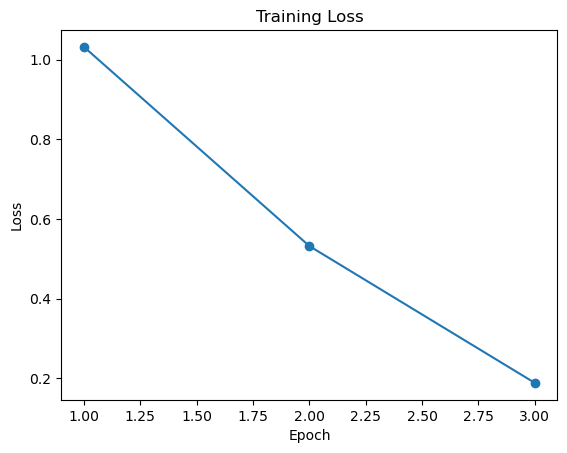

Test Accuracy: 86.28%
Confusion Matrix:
[[ 55   4   4]
 [  8  39   3]
 [ 12   0 101]]
Class 0:
  TP: 55, TN: 143, FP: 20, FN: 8
Class 1:
  TP: 39, TN: 172, FP: 4, FN: 11
Class 2:
  TP: 101, TN: 106, FP: 7, FN: 12


In [29]:
# Baseline Model


# Initialize an empty list to store the loss at each epoch
loss_values = []

# Training loop
epochs = 3  # Adjust epochs based on your needs
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)  # Store the average loss for this epoch
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
evaluate_model(model,test_loader)

In [30]:
# printing the model parameters
for name, param in model.named_parameters():
    print(f"Parameter Name: {name}")
    print(f"Parameter Shape: {param.shape}")
    print(f"Requires Grad: {param.requires_grad}")
    print()

Parameter Name: bert.embeddings.word_embeddings.weight
Parameter Shape: torch.Size([30522, 768])
Requires Grad: True

Parameter Name: bert.embeddings.position_embeddings.weight
Parameter Shape: torch.Size([512, 768])
Requires Grad: True

Parameter Name: bert.embeddings.token_type_embeddings.weight
Parameter Shape: torch.Size([2, 768])
Requires Grad: True

Parameter Name: bert.embeddings.LayerNorm.weight
Parameter Shape: torch.Size([768])
Requires Grad: True

Parameter Name: bert.embeddings.LayerNorm.bias
Parameter Shape: torch.Size([768])
Requires Grad: True

Parameter Name: bert.encoder.layer.0.attention.self.query.weight
Parameter Shape: torch.Size([768, 768])
Requires Grad: True

Parameter Name: bert.encoder.layer.0.attention.self.query.bias
Parameter Shape: torch.Size([768])
Requires Grad: True

Parameter Name: bert.encoder.layer.0.attention.self.key.weight
Parameter Shape: torch.Size([768, 768])
Requires Grad: True

Parameter Name: bert.encoder.layer.0.attention.self.key.bias
Para

Epoch 1, Loss: 0.6378025143292912
Epoch 2, Loss: 0.21108527383521983
Epoch 3, Loss: 0.17622039086397803


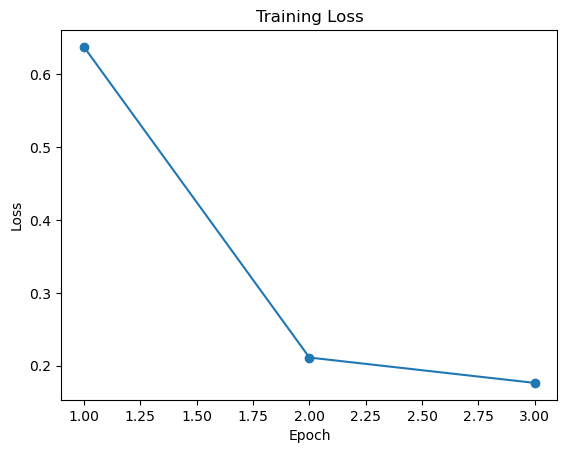

In [31]:
# Freezing layers

for name, param in model.named_parameters():
    if "encoder.layer.0" in name or "encoder.layer.1" in name:
        param.requires_grad = False

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-4, weight_decay=0.01)


# Initialize an empty list to store the loss at each epoch
loss_values = []

# Training loop
epochs = 3  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)  # Storing the average loss for this epoch
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')


# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [32]:
evaluate_model(model,test_loader)

Test Accuracy: 85.84%
Confusion Matrix:
[[ 58   1   4]
 [ 12  28  10]
 [  5   0 108]]
Class 0:
  TP: 58, TN: 146, FP: 17, FN: 5
Class 1:
  TP: 28, TN: 175, FP: 1, FN: 22
Class 2:
  TP: 108, TN: 99, FP: 14, FN: 5


Epoch 1, Loss: 0.06969842895993898
Epoch 2, Loss: 0.0140837788068015
Epoch 3, Loss: 0.009082205449070397


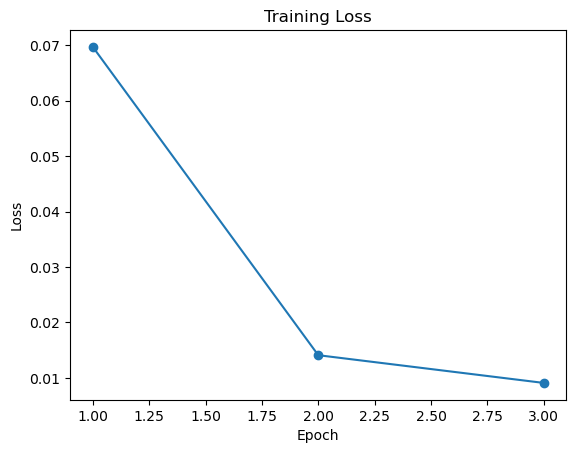

In [33]:
# Batch size  = 32
# Learning rate = 0.00002

train_loader = create_dataloader(train_df,batch_size=32)
test_loader = create_dataloader(test_df,batch_size=32)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


loss_values = []

# Training loop
epochs = 3  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



In [34]:
evaluate_model(model,test_loader)

Test Accuracy: 90.27%
Confusion Matrix:
[[ 57   2   4]
 [  6  42   2]
 [  4   4 105]]
Class 0:
  TP: 57, TN: 153, FP: 10, FN: 6
Class 1:
  TP: 42, TN: 170, FP: 6, FN: 8
Class 2:
  TP: 105, TN: 107, FP: 6, FN: 8


Epoch 1, Loss: 0.07913180028794911
Epoch 2, Loss: 0.1468157722967966
Epoch 3, Loss: 0.04890234452062126


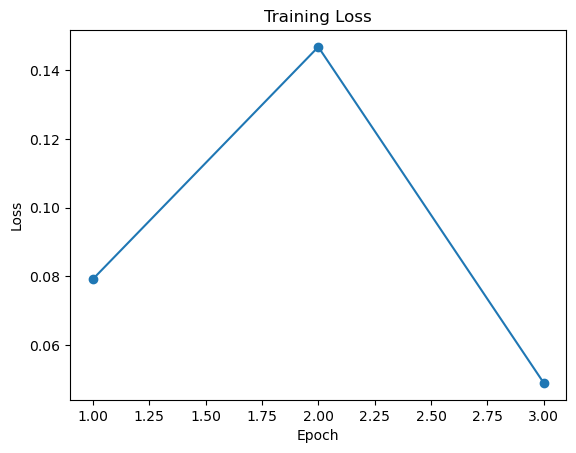

Test Accuracy: 90.71%
Confusion Matrix:
[[ 51   3   9]
 [  0  41   9]
 [  0   0 113]]
Class 0:
  TP: 51, TN: 163, FP: 0, FN: 12
Class 1:
  TP: 41, TN: 173, FP: 3, FN: 9
Class 2:
  TP: 113, TN: 95, FP: 18, FN: 0


In [35]:
train_loader = create_dataloader(train_df,batch_size=32)
test_loader = create_dataloader(test_df,batch_size=32)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-4)


loss_values = []

# Training loop
epochs = 3  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
evaluate_model(model,test_loader)


Epoch 1, Loss: 0.013349560151497523
Epoch 2, Loss: 0.0025214230952163535
Epoch 3, Loss: 0.001852306273455421


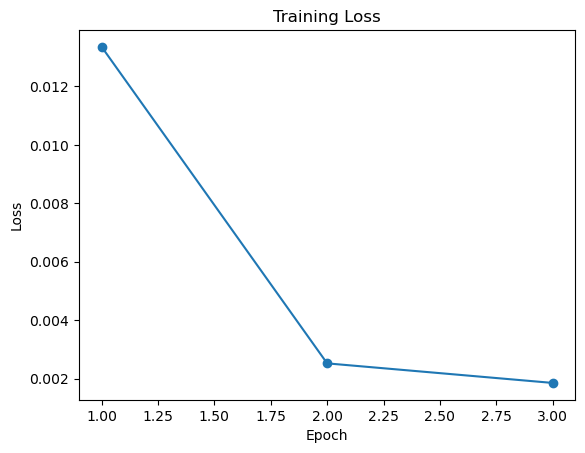

Test Accuracy: 89.38%
Confusion Matrix:
[[ 57   0   6]
 [  6  40   4]
 [  8   0 105]]
Class 0:
  TP: 57, TN: 149, FP: 14, FN: 6
Class 1:
  TP: 40, TN: 176, FP: 0, FN: 10
Class 2:
  TP: 105, TN: 103, FP: 10, FN: 8


In [36]:
# Batch size  = 64
# Learning rate = 0.00002

train_loader = create_dataloader(train_df,batch_size=64)
test_loader = create_dataloader(test_df,batch_size=64)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


loss_values = []

# Training loop
epochs = 3  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

evaluate_model(model,test_loader)

Epoch 1, Loss: 0.032893158338365855
Epoch 2, Loss: 0.0397383684396808
Epoch 3, Loss: 0.06422743321685441


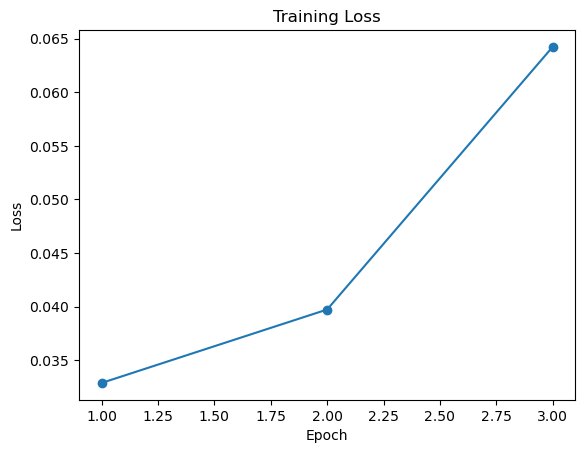

Test Accuracy: 91.15%
Confusion Matrix:
[[ 57   0   6]
 [  0  44   6]
 [  2   6 105]]
Class 0:
  TP: 57, TN: 161, FP: 2, FN: 6
Class 1:
  TP: 44, TN: 170, FP: 6, FN: 6
Class 2:
  TP: 105, TN: 101, FP: 12, FN: 8


In [37]:
# batch size = 64
# learning rate = 0.0002
train_loader = create_dataloader(train_df,batch_size=32)
test_loader = create_dataloader(test_df,batch_size=32)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-4)

loss_values = []

# Training loop
epochs = 3  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
evaluate_model(model,test_loader)


Epoch 1, Loss: 0.006834070707554929
Epoch 2, Loss: 0.001087033400835935
Epoch 3, Loss: 0.0008397265846724622


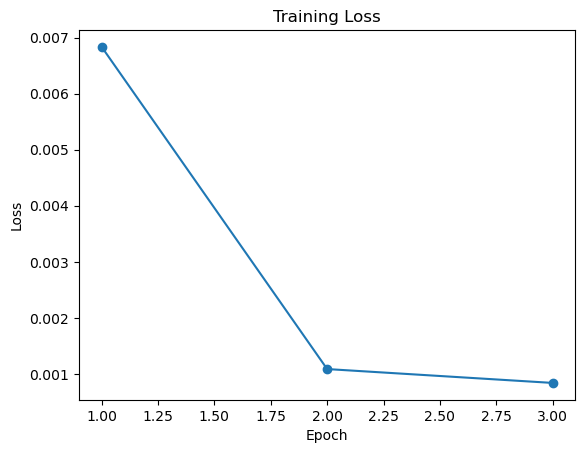

Test Accuracy: 90.27%
Confusion Matrix:
[[ 59   0   4]
 [  0  44   6]
 [  6   6 101]]
Class 0:
  TP: 59, TN: 157, FP: 6, FN: 4
Class 1:
  TP: 44, TN: 170, FP: 6, FN: 6
Class 2:
  TP: 101, TN: 103, FP: 10, FN: 12


In [38]:
# batch size = 128
# learning rate = 0.00002
train_loader = create_dataloader(train_df,batch_size=128)
test_loader = create_dataloader(test_df,batch_size=128)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


loss_values = []

# Training loop
epochs = 3  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
evaluate_model(model,test_loader)


Epoch 1, Loss: 0.0003359042621013941
Epoch 2, Loss: 7.311945182664203e-05
Epoch 3, Loss: 4.085559044142428e-05


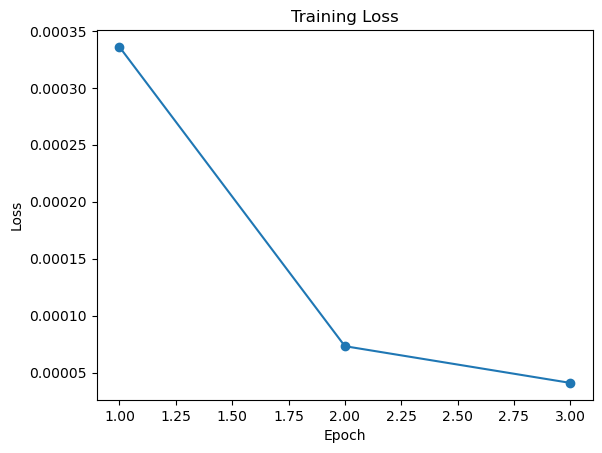

Test Accuracy: 90.27%
Confusion Matrix:
[[ 61   0   2]
 [  2  42   6]
 [ 10   2 101]]
Class 0:
  TP: 61, TN: 151, FP: 12, FN: 2
Class 1:
  TP: 42, TN: 174, FP: 2, FN: 8
Class 2:
  TP: 101, TN: 105, FP: 8, FN: 12


In [39]:
# batch size = 128
# learning rate = 0.0002
train_loader = create_dataloader(train_df,batch_size=128)
test_loader = create_dataloader(test_df,batch_size=128)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-4)


loss_values = []

# Training loop
epochs = 3  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
evaluate_model(model,test_loader)


## Increasing number of epochs = 5

In [40]:
# redefining the model to bring it to its base stage
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [41]:
# preparing the train test data to train the model
train_loader = create_dataloader(train_df)
test_loader = create_dataloader(test_df)

Epoch 1, Loss: 1.0424453752082692
Epoch 2, Loss: 0.7426122521099291
Epoch 3, Loss: 0.3481244089964189
Epoch 4, Loss: 0.11960394040011522
Epoch 5, Loss: 0.13398612376808988


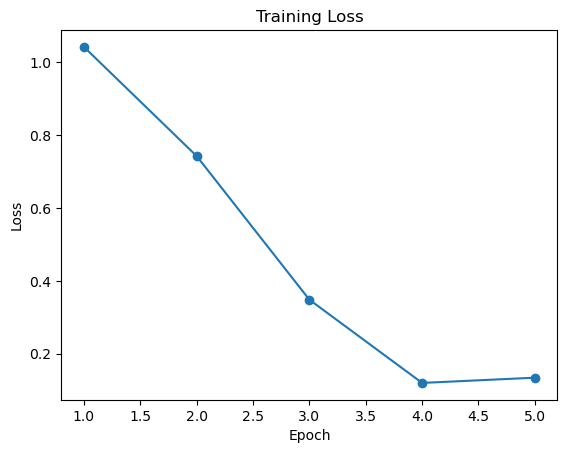

Test Accuracy: 88.05%
Confusion Matrix:
[[ 52   7   4]
 [  0  41   9]
 [  0   7 106]]
Class 0:
  TP: 52, TN: 163, FP: 0, FN: 11
Class 1:
  TP: 41, TN: 162, FP: 14, FN: 9
Class 2:
  TP: 106, TN: 100, FP: 13, FN: 7


In [42]:
# Freezing layers with epochs = 5

for name, param in model.named_parameters():
    if "encoder.layer.0" in name or "encoder.layer.1" in name:
        param.requires_grad = False

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-4, weight_decay=0.01)


# Initialize an empty list to store the loss at each epoch
loss_values = []

# Training loop
epochs = 5  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)  # Storing the average loss for this epoch
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')


# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

evaluate_model(model,test_loader)



Epoch 1, Loss: 0.03126501548906852
Epoch 2, Loss: 0.00694979638150283
Epoch 3, Loss: 0.0028269775813959284
Epoch 4, Loss: 0.0017083985690862454
Epoch 5, Loss: 0.0012700588217583195


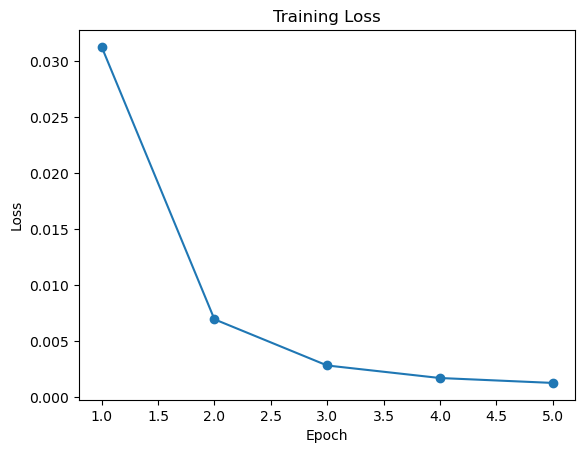

Test Accuracy: 89.38%
Confusion Matrix:
[[ 53   6   4]
 [  0  44   6]
 [  0   8 105]]
Class 0:
  TP: 53, TN: 163, FP: 0, FN: 10
Class 1:
  TP: 44, TN: 162, FP: 14, FN: 6
Class 2:
  TP: 105, TN: 103, FP: 10, FN: 8


In [43]:
# Batch size  = 32
# Learning rate = 0.00002

train_loader = create_dataloader(train_df,batch_size=32)
test_loader = create_dataloader(test_df,batch_size=32)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

loss_values = []

# Training loop
epochs = 5  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

evaluate_model(model,test_loader)



Epoch 1, Loss: 0.00021600742974410894
Epoch 2, Loss: 0.03773771355993411
Epoch 3, Loss: 0.12151672735665764
Epoch 4, Loss: 0.08693508244248042
Epoch 5, Loss: 0.007957750144575176


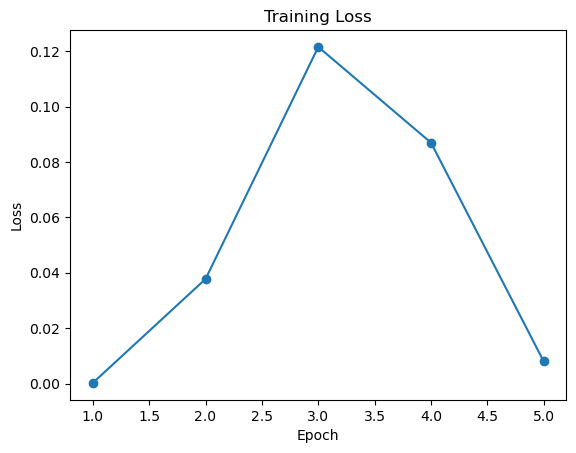

Test Accuracy: 89.38%
Confusion Matrix:
[[63  0  0]
 [ 2 40  8]
 [12  2 99]]
Class 0:
  TP: 63, TN: 149, FP: 14, FN: 0
Class 1:
  TP: 40, TN: 174, FP: 2, FN: 10
Class 2:
  TP: 99, TN: 105, FP: 8, FN: 14


In [44]:
# Batch size  = 32
# Learning rate = 0.0002

train_loader = create_dataloader(train_df,batch_size=32)
test_loader = create_dataloader(test_df,batch_size=32)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-4)


loss_values = []

# Training loop
epochs = 5  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

evaluate_model(model,test_loader)


Epoch 1, Loss: 0.014878198551014066
Epoch 2, Loss: 0.010566111708370348
Epoch 3, Loss: 0.0018933087956005087
Epoch 4, Loss: 0.004448838287498802
Epoch 5, Loss: 0.0007658683714301636


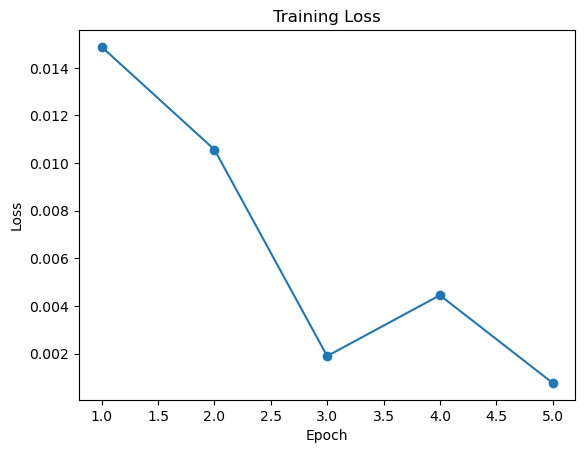

Test Accuracy: 88.50%
Confusion Matrix:
[[ 57   6   0]
 [  2  40   8]
 [  6   4 103]]
Class 0:
  TP: 57, TN: 155, FP: 8, FN: 6
Class 1:
  TP: 40, TN: 166, FP: 10, FN: 10
Class 2:
  TP: 103, TN: 105, FP: 8, FN: 10


In [45]:
# Batch size  = 64
# Learning rate = 0.00002

train_loader = create_dataloader(train_df,batch_size=64)
test_loader = create_dataloader(test_df,batch_size=64)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


loss_values = []

# Training loop
epochs = 5  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
evaluate_model(model,test_loader)


Epoch 1, Loss: 0.06630017324792349
Epoch 2, Loss: 0.025980071887245465
Epoch 3, Loss: 0.08764666094091432
Epoch 4, Loss: 0.012051092245985336
Epoch 5, Loss: 0.037038809441206653


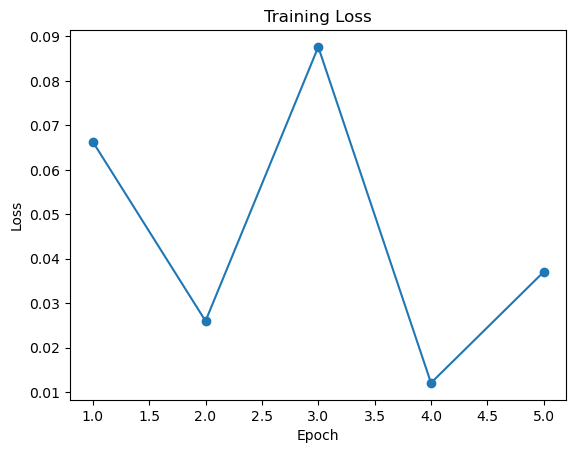

Test Accuracy: 86.28%
Confusion Matrix:
[[55  4  4]
 [ 0 44  6]
 [ 5 12 96]]
Class 0:
  TP: 55, TN: 158, FP: 5, FN: 8
Class 1:
  TP: 44, TN: 160, FP: 16, FN: 6
Class 2:
  TP: 96, TN: 103, FP: 10, FN: 17


In [46]:
# batch size = 64
# learning rate = 0.0002

train_loader = create_dataloader(train_df,batch_size=32)
test_loader = create_dataloader(test_df,batch_size=32)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-4)


loss_values = []

# Training loop
epochs = 5  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
evaluate_model(model,test_loader)


Epoch 1, Loss: 0.036010288196848705
Epoch 2, Loss: 0.00463564065285027
Epoch 3, Loss: 0.01821484927495476
Epoch 4, Loss: 0.0009492788158240728
Epoch 5, Loss: 0.00970436014176812


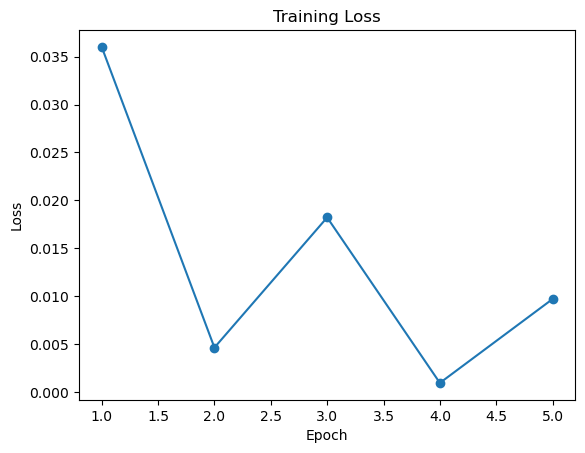

Test Accuracy: 88.50%
Confusion Matrix:
[[ 55   4   4]
 [  0  44   6]
 [  6   6 101]]
Class 0:
  TP: 55, TN: 157, FP: 6, FN: 8
Class 1:
  TP: 44, TN: 166, FP: 10, FN: 6
Class 2:
  TP: 101, TN: 103, FP: 10, FN: 12


In [47]:
# batch size = 128
# learning rate 0.00002
train_loader = create_dataloader(train_df,batch_size=128)
test_loader = create_dataloader(test_df,batch_size=128)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


loss_values = []

# Training loop
epochs = 5  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
evaluate_model(model,test_loader)


Epoch 1, Loss: 0.00018098412965628086
Epoch 2, Loss: 0.038553524083909
Epoch 3, Loss: 0.010093362127008731
Epoch 4, Loss: 0.010808204595377902
Epoch 5, Loss: 0.0008365195144506288


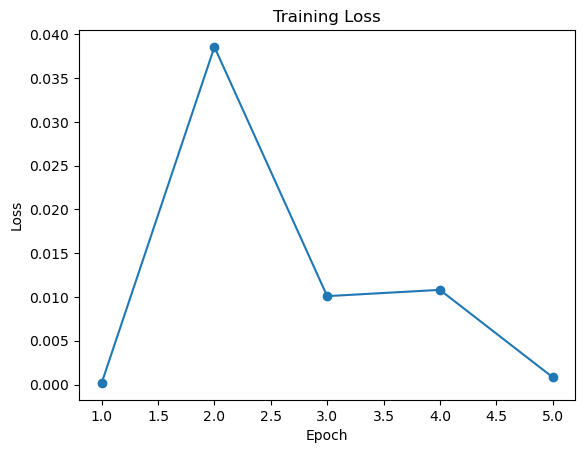

Test Accuracy: 85.40%
Confusion Matrix:
[[57  6  0]
 [ 0 46  4]
 [ 8 15 90]]
Class 0:
  TP: 57, TN: 155, FP: 8, FN: 6
Class 1:
  TP: 46, TN: 155, FP: 21, FN: 4
Class 2:
  TP: 90, TN: 109, FP: 4, FN: 23


In [49]:
# batch size = 128
# learning rate = 0.0002
train_loader = create_dataloader(train_df,batch_size=128)
test_loader = create_dataloader(test_df,batch_size=128)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-4)


loss_values = []

# Training loop
epochs = 5  
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')

# Plot the loss values
plt.plot(range(1, epochs+1), loss_values, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
evaluate_model(model,test_loader)


In [4]:
!jupyter nbconvert --to html AIT726_Team2_AA_SG_MG_SentimentAnalysis.ipynb


[NbConvertApp] Converting notebook AIT726_Team2_AA_SG_MG_SentimentAnalysis.ipynb to html
Traceback (most recent call last):
  File "/Users/mayankgrover/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Users/mayankgrover/anaconda3/lib/python3.11/site-packages/jupyter_core/application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mayankgrover/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/mayankgrover/anaconda3/lib/python3.11/site-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/Users/mayankgrover/anaconda3/lib/python3.11/site-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/Users/mayankgrover/anaconda3/lib/pytho